In [32]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import import_ipynb
from model import Model

In [33]:
FIG_FOLDER = 'fig'
SOURCE_FOLDER = os.path.join('data', 'source')
BACKUP_FOLDER = os.path.join('data', 'backup')
print(f"The source folder is: {os.path.abspath(SOURCE_FOLDER)}")
print(f"The figure folder is: {os.path.abspath(FIG_FOLDER)}")
print(f"The backup folder is: {os.path.abspath(BACKUP_FOLDER)}")

# Create folders
for f in SOURCE_FOLDER, FIG_FOLDER, BACKUP_FOLDER:
    os.makedirs(f, exist_ok=True)

The source folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/source
The figure folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/fig
The backup folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/backup


### Load the results

In [34]:
df_fit = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_fit_w10.csv"), index_col=0)
df_fit.reset_index(inplace=True)
df_fit.drop("index", axis=1, inplace=True)
df_fit.date = pd.to_datetime(df_fit.date)
df_fit

,distortion,precision,risk_aversion,date,monkey,condition,n
0,0.200000,4.270038,0.990000,2020-06-25,Ola,gain,184
1,0.200000,2.771034,0.371044,2020-06-26,Ola,gain,190
2,0.200000,3.808867,0.430676,2020-06-27,Ola,gain,208
3,0.200000,3.722660,0.085007,2020-06-28,Ola,gain,220
4,0.200000,4.670819,0.132592,2020-06-29,Ola,gain,244
...,...,...,...,...,...,...,...
2607,0.200000,10.000000,-0.990000,2020-10-20,Yin,loss,77
2608,0.313025,10.000000,-0.990000,2020-10-21,Yin,loss,71
2609,0.200000,10.000000,-0.990000,2020-10-22,Yin,loss,70
2610,1.159001,10.000000,0.790311,2020-10-24,Yin,loss,66


In [35]:
df_elo = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_elo.csv"), index_col=0)
df_elo.index = pd.to_datetime(df_elo.index)
df_elo

,nem,yak,ner,yoh,nen,wot,pac,las,anu,ola,...,olg,jea,pat,bar,ces,lad,ber,dor,eri,fic
date,,,,,,,,,,,,,,,,,,,,,
2016-10-25,1024,1009,1018,984,991,1010,991,982,991,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-26,1032,1009,1018,1003,991,1010,982,964,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-27,1032,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-28,1041,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-29,1063,1009,1018,1011,991,1010,975,941,984,1008,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,938,1243,961,840,1018,1234,1379,713,1117,1287,...,933,760,841,1083,837,753,743,766,702,579
2020-10-22,970,1243,962,840,1018,1234,1347,716,1105,1296,...,935,755,841,1070,832,753,743,795,702,566
2020-10-23,971,1243,970,840,1018,1234,1347,735,1105,1296,...,920,751,841,1072,838,753,758,773,668,566


# Correlation

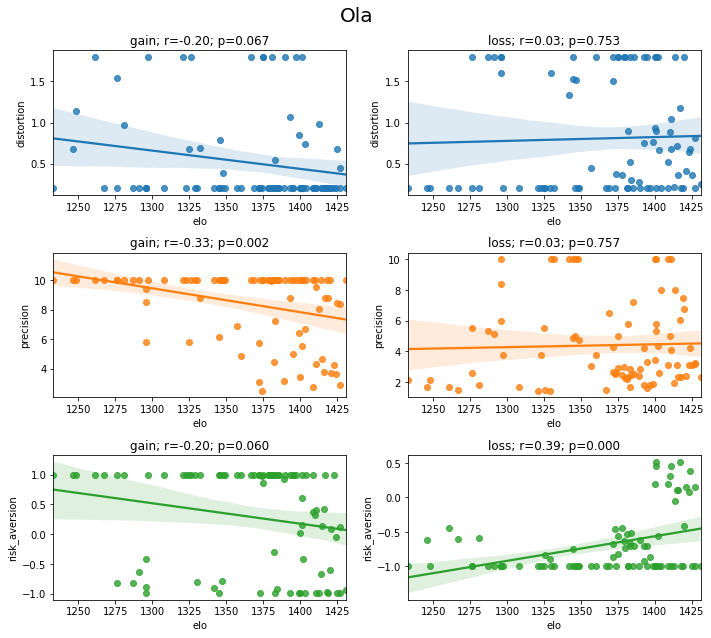

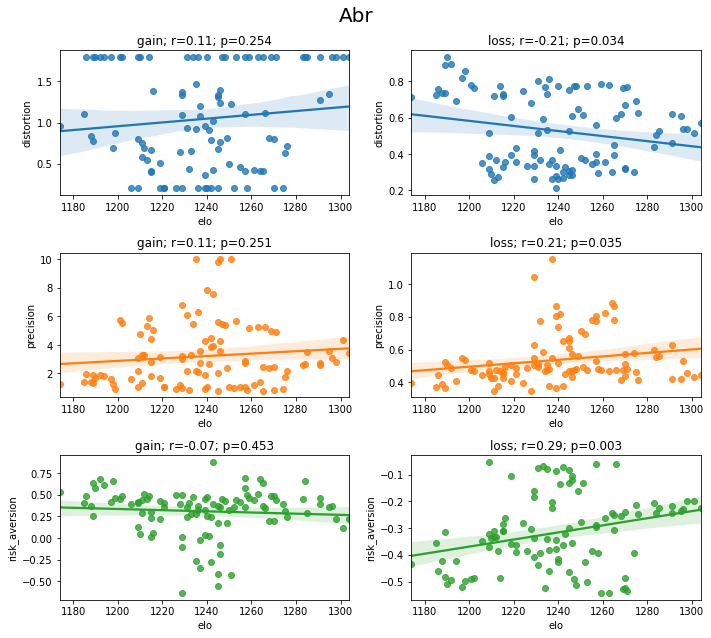

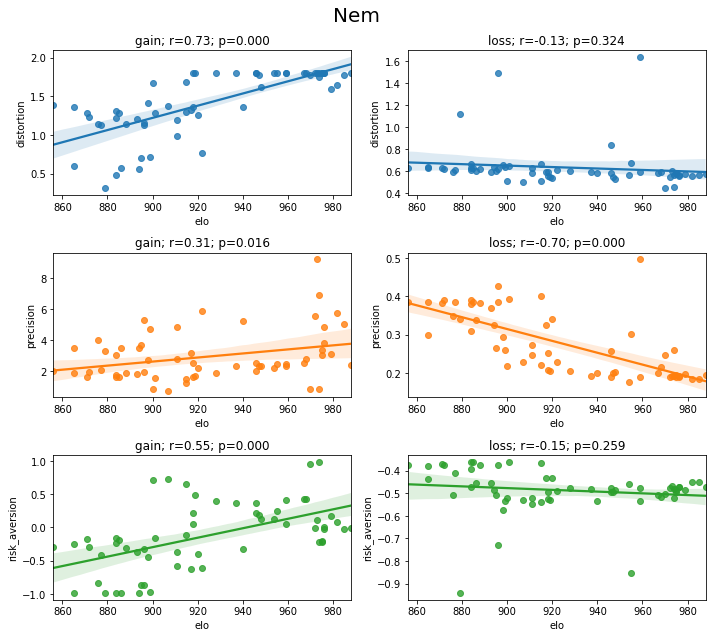

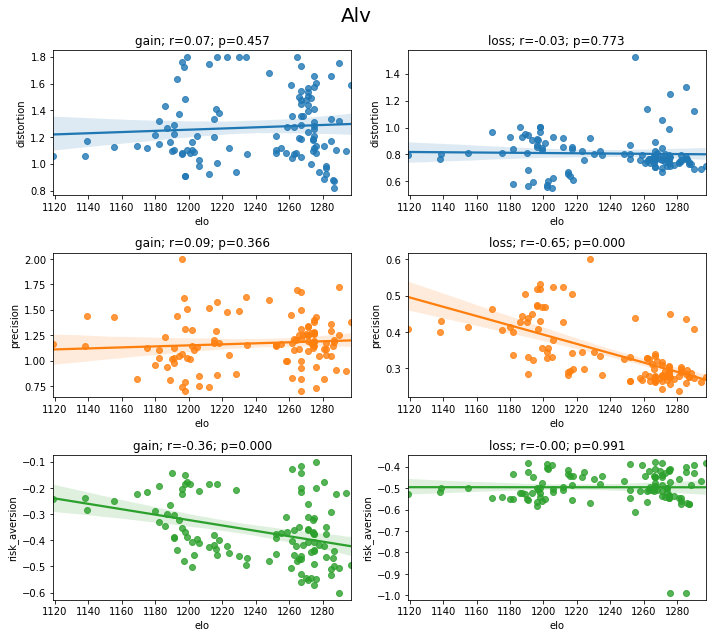

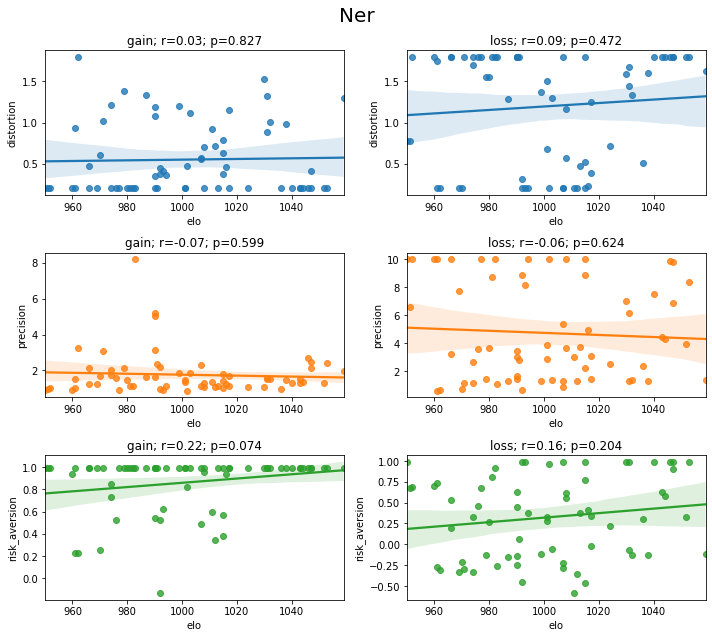

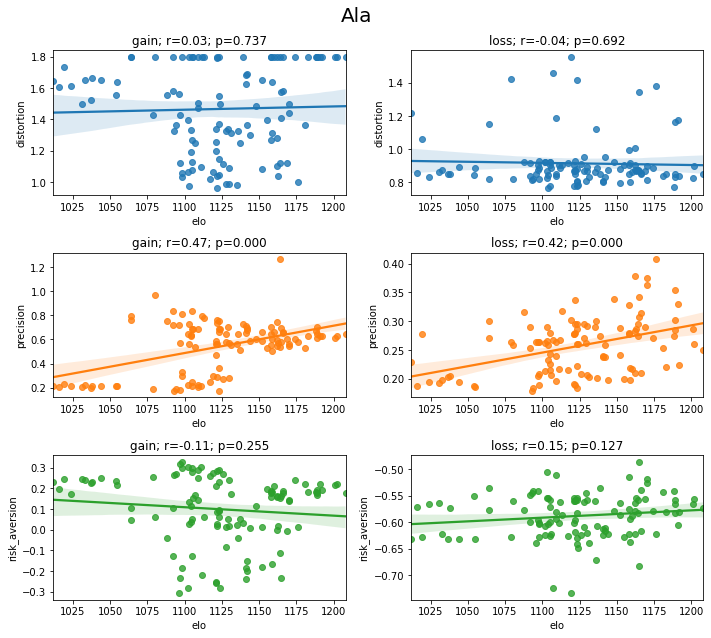

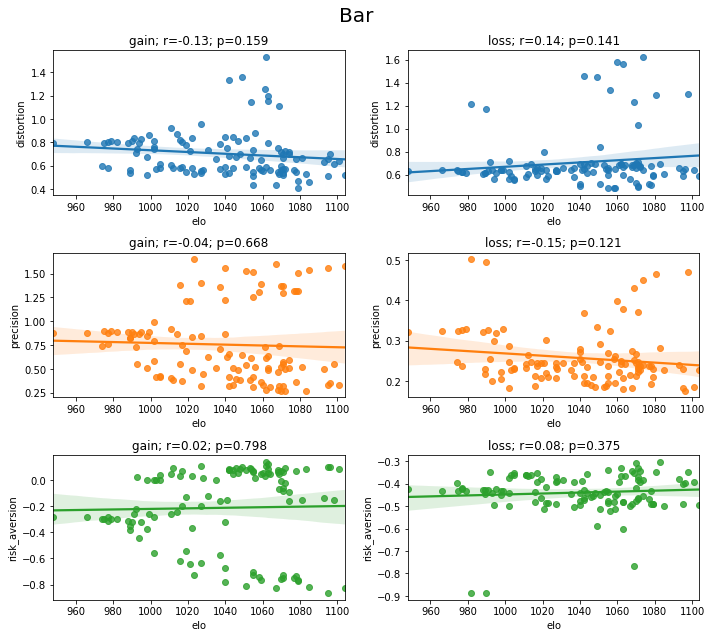

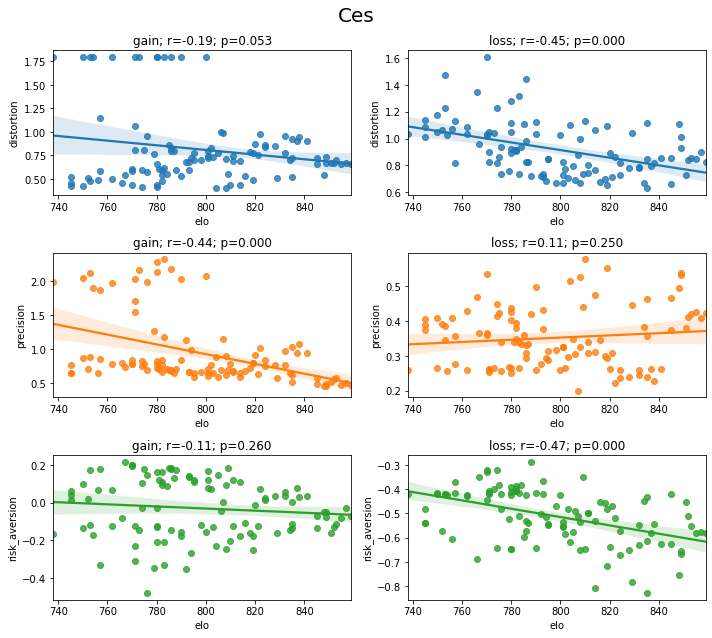

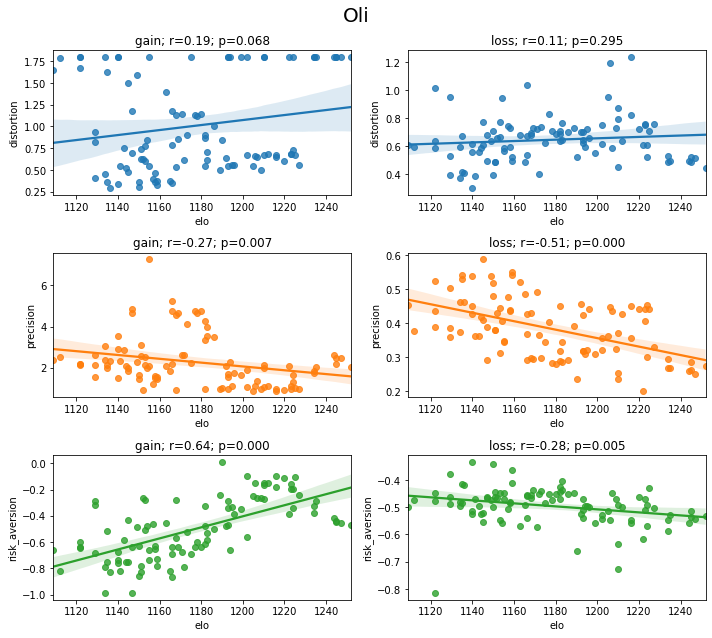

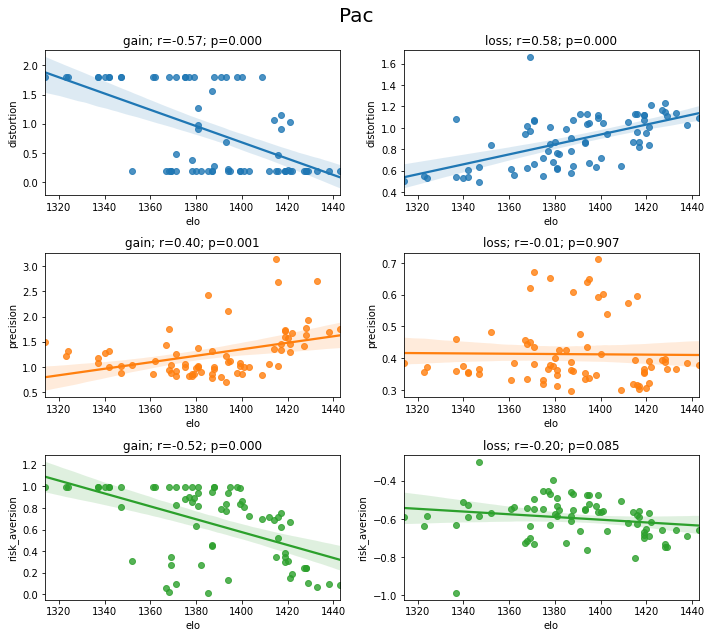

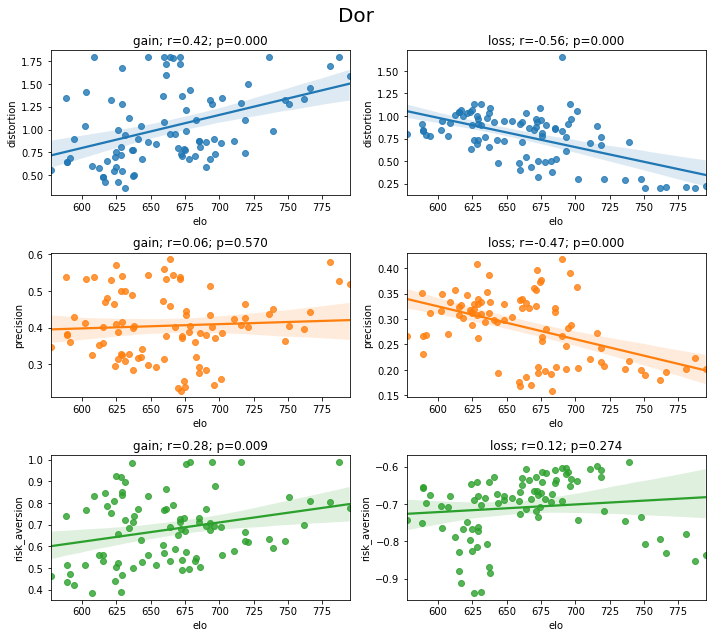

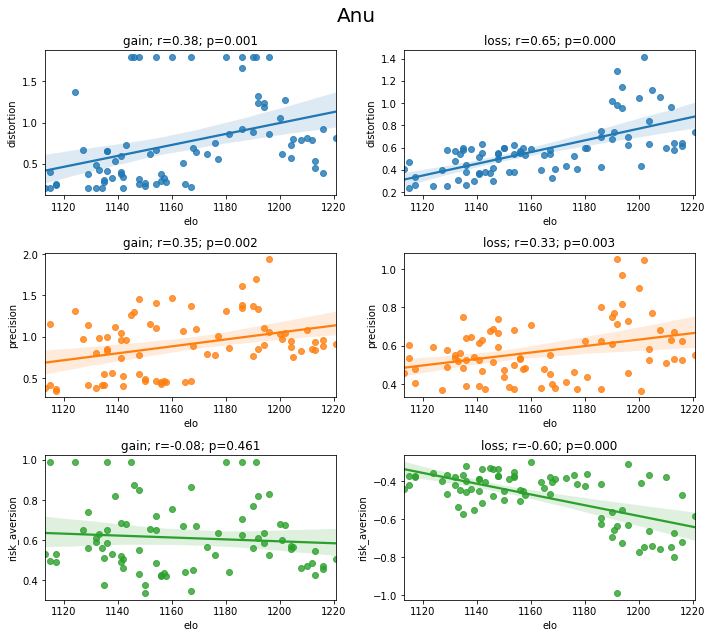

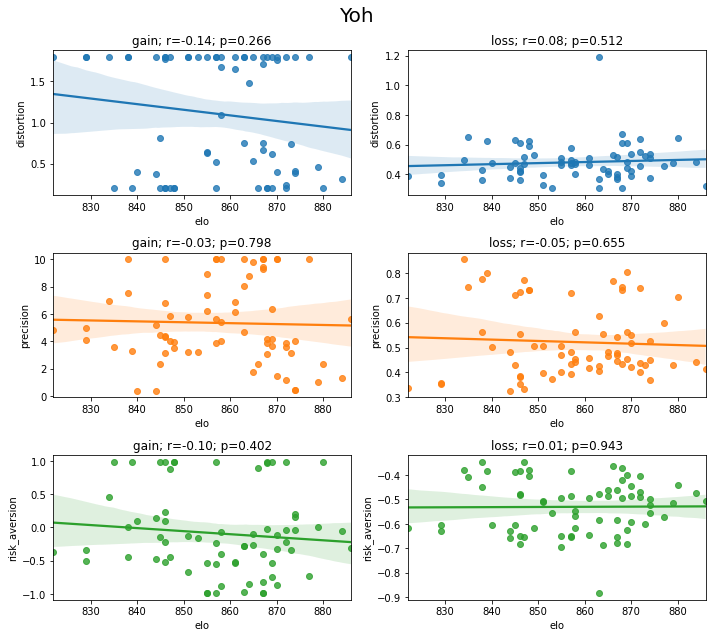

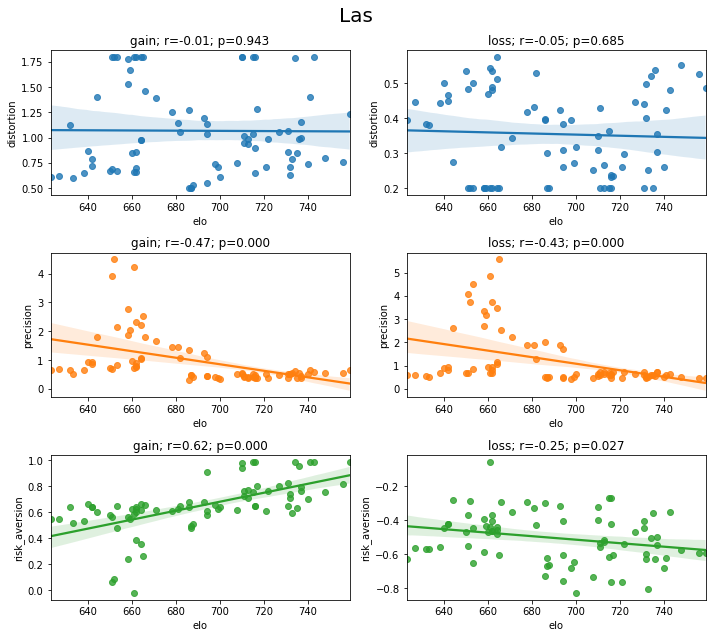

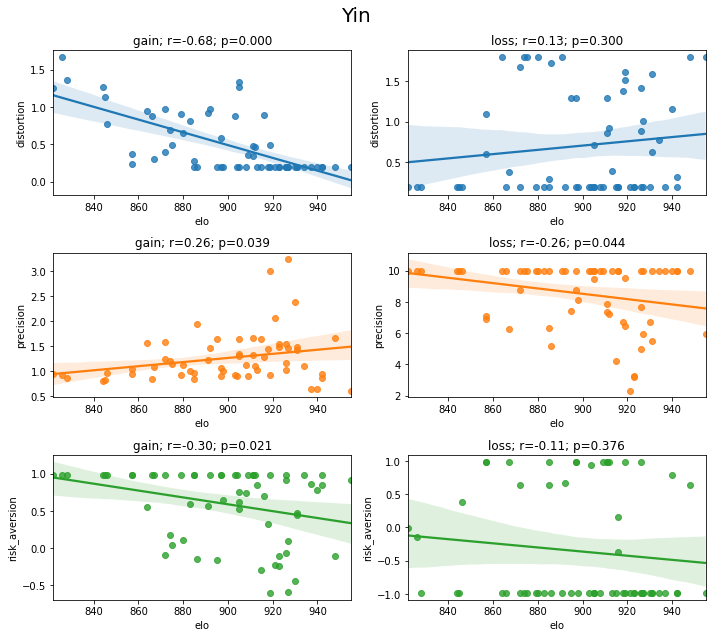

In [36]:
monkeys = df_fit.monkey.unique()
cond = ("gain", "loss")
n_param = len(Model.param_labels)

for i, m in enumerate(monkeys):
    
    fig, axes = plt.subplots(figsize=(10, 3*n_param), nrows=n_param, ncols=len(cond))
    fig.suptitle(m, fontsize=20)
    
    for j, cd in enumerate(cond):
        
        df_p = df_fit[(df_fit.monkey == m) & (df_fit.condition == cd)]
        
        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[df_elo_m.index >= min(df_p.date)]
        
        for k in range(n_param):
            
            param = Model.param_labels[k]
            
            df_ = pd.DataFrame({
                param: df_p[param].values, 
                "elo": df_elo_m        
            }, index=df_p.date)
            
            r_, p = scipy.stats.pearsonr(df_.elo, df_[param].values)
            
            ax = axes[k, j]
            t = f"{cd}; r={r_:.2f}; p={p:.3f}"
            ax.set_title(t)
            
            sns.regplot(x="elo", y=param, data=df_, color=f"C{k}", ax=ax)
    
    plt.tight_layout()
    plt.show()

In [38]:
monkeys = df_fit.monkey.unique()
cond = df_fit.condition.unique()
param = Model.param_labels    

d = [] 

for i, m in enumerate(monkeys):
    
    for j, cd in enumerate(cond):
        
        df_p = df_fit[(df_fit.monkey == m) & (df_fit.condition == cd)]
        
        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[df_elo_m.index >= min(df_p.date)]
        
        for k, pr in enumerate(param):
  
            df_ = pd.DataFrame({
                pr: df_p[pr].values, 
                "elo": df_elo_m        
            }, index=df_p.date)
            
            r_, p = scipy.stats.pearsonr(df_.elo, df_[pr].values)
            
            d.append({"monkey": m, "condition": cd, "param": pr, "r": r_, "p": p})

df = pd.DataFrame(d)
            
for cd in cond:
    for pr in param:
        d = df[(df.param == pr) & (df.condition == cd)]
        sgn = d.p < 0.05
        pos = d[sgn].r > 0
        neg = d[sgn].r < 0
        print(f"{pr}-{cd}: {np.sum(sgn)} sign. ({np.sum(pos)} +, {np.sum(neg)} -)")

distortion-gain: 5 sign. (3 +, 2 -)
precision-gain: 9 sign. (5 +, 4 -)
risk_aversion-gain: 7 sign. (4 +, 3 -)
distortion-loss: 5 sign. (2 +, 3 -)
precision-loss: 9 sign. (3 +, 6 -)
risk_aversion-loss: 6 sign. (2 +, 4 -)
